# Preprocessing the properties dataset


### Importing the libraries

In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Importing the dataset

In [55]:
# Description: This script is used to connect to the MySQL database and fetch data from the property_info table.
# Load environment variables
load_dotenv()

try:
    connection = mysql.connector.connect(
        host=os.getenv('DB_HOST'),
        user=os.getenv('DB_USER'),
        password=os.getenv('DB_PASSWORD'),
        database='properties'
    )

    if connection.is_connected():
        print('Connected to MySQL database')

    # Define your SQL query and fetch data
    sql_query = "SELECT * FROM property_info"
    df = pd.read_sql(sql_query, connection)

except Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    if connection.is_connected():
        connection.close()
        print('MySQL connection closed')


Connected to MySQL database
MySQL connection closed


/var/folders/z3/qv2p67717670lmtsx4lfkzpw0000gn/T/ipykernel_6616/1262242826.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, connection)


### Start preprocessing

In [4]:
df.tail()

,id,url,title,city,region,type,num_rooms,num_bathrooms,size,price
37144,37145,https://emirates.estate/o127173/,"Apartment in Jumeirah Village Circle, № 127173",Dubai,Jumeirah Village Circle,Apartment,2,2,111.50,995780.0
37145,37146,https://emirates.estate/property/o116454/,"Apartment in Dubai Harbour, № 116454",Dubai,Dubai Harbour,Apartment,1,1,81.29,2800000.0
37146,37147,https://emirates.estate/o129296/,Apartment in CREEK RISE in Dubai Creek Harbour...,Dubai,Dubai Creek Harbour (The Lagoons),Apartment,3,3,102.00,3216890.0
37147,37148,https://emirates.estate/property/o131530/,"Apartment in Dubai, № 131530",Dubai,None,Apartment,2,3,102.20,698000.0
37148,37149,https://emirates.estate/o128931/,"Apartment in JEWELZ in Arjan, UAE 2 bedrooms ...",Dubai,Arjan,Apartment,2,2,37.00,1141000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37149 entries, 0 to 37148
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             37149 non-null  int64  
 1   url            37149 non-null  object 
 2   title          37149 non-null  object 
 3   city           37149 non-null  object 
 4   region         30461 non-null  object 
 5   type           37119 non-null  object 
 6   num_rooms      37149 non-null  int64  
 7   num_bathrooms  37149 non-null  int64  
 8   size           37149 non-null  float64
 9   price          37149 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.8+ MB


In [6]:
df.nunique()

id               37149
url              33173
title            33244
city                 1
region             142
type                16
num_rooms           23
num_bathrooms       22
size              7127
price             9526
dtype: int64

In [7]:
df.describe()

,id,num_rooms,num_bathrooms,size,price
count,37149.000000,37149.000000,37149.000000,3.714900e+04,3.714900e+04
mean,18575.000000,2.429971,2.821099,1.497516e+03,7.940347e+06
std,10724.136912,2.692233,2.589525,1.216711e+05,3.821790e+07
min,1.000000,1.000000,1.000000,4.000000e-01,2.500000e+02
25%,9288.000000,1.000000,1.000000,7.950000e+01,1.404000e+06
50%,18575.000000,2.000000,2.000000,1.308000e+02,2.534030e+06
75%,27862.000000,3.000000,4.000000,2.402000e+02,4.999950e+06
max,37149.000000,356.000000,326.000000,1.858050e+07,1.958890e+09


In [8]:
df.isnull().sum()

id                  0
url                 0
title               0
city                0
region           6688
type               30
num_rooms           0
num_bathrooms       0
size                0
price               0
dtype: int64

In [9]:
df[df['size'] < 0]

,id,url,title,city,region,type,num_rooms,num_bathrooms,size,price


In [10]:
df = df.groupby('region').filter(lambda x: len(x) > 5)

In [11]:
df2 = df.copy(deep=True)
df2.drop(["id", "url", "title", "city"], axis=1, inplace=True)

In [12]:
df2.dropna(subset=['region', 'type'], axis=0, inplace=True)

In [13]:
df2.tail()

,region,type,num_rooms,num_bathrooms,size,price
37143,Remraam,Apartment,2,3,139.20,870000.0
37144,Jumeirah Village Circle,Apartment,2,2,111.50,995780.0
37145,Dubai Harbour,Apartment,1,1,81.29,2800000.0
37146,Dubai Creek Harbour (The Lagoons),Apartment,3,3,102.00,3216890.0
37148,Arjan,Apartment,2,2,37.00,1141000.0


In [14]:
df2.isnull().sum()

region           0
type             0
num_rooms        0
num_bathrooms    0
size             0
price            0
dtype: int64

In [15]:
df2.reset_index(drop=True, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30368 entries, 0 to 30367
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         30368 non-null  object 
 1   type           30368 non-null  object 
 2   num_rooms      30368 non-null  int64  
 3   num_bathrooms  30368 non-null  int64  
 4   size           30368 non-null  float64
 5   price          30368 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.4+ MB


In [16]:
df2.nunique()

region            105
type               16
num_rooms          21
num_bathrooms      21
size             6366
price            8066
dtype: int64

In [17]:
df2.drop_duplicates(inplace=True)

In [18]:
df2.describe()

,num_rooms,num_bathrooms,size,price
count,24423.000000,24423.000000,2.442300e+04,2.442300e+04
mean,2.271097,2.726119,8.290356e+02,7.373551e+06
std,2.667331,2.897457,7.187820e+04,3.527260e+07
min,1.000000,1.000000,4.000000e-01,2.500000e+02
25%,1.000000,1.000000,7.700000e+01,1.376915e+06
50%,2.000000,2.000000,1.224000e+02,2.500000e+06
75%,3.000000,4.000000,2.118000e+02,4.800000e+06
max,356.000000,326.000000,1.120350e+07,1.958890e+09


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24423 entries, 0 to 30316
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         24423 non-null  object 
 1   type           24423 non-null  object 
 2   num_rooms      24423 non-null  int64  
 3   num_bathrooms  24423 non-null  int64  
 4   size           24423 non-null  float64
 5   price          24423 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ MB


### Encoding categorical data

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df2[['region', 'type']])

encoded_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['region', 'type']))

# Reset the index
df2 = df2.reset_index(drop=True)
encoded_data = encoded_data.reset_index(drop=True)

df3 = pd.concat([df2.drop(columns=['region', 'type']), encoded_data], axis=1)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
# df3 = df2.copy(deep=True)

# df3 = pd.get_dummies(df3, columns=['region', 'type'], drop_first=True)

# bool_cols = df3.select_dtypes(include='bool').columns
# df3[bool_cols] = df3[bool_cols].astype('int64')

# df3.reset_index(drop=True, inplace=True)


In [22]:
for col in df3.columns:
    if 'type' in col: 
        print(col)

type_Apartment
type_Building
type_Cafe / restaurant
type_Commercial property
type_Duplex
type_Factory
type_Hotel
type_Hotel Apartment
type_Labor Camp
type_Land
type_Office
type_Penthouse
type_Shop
type_Townhouse
type_Villa
type_Warehouse


In [23]:
df3.tail()

,num_rooms,num_bathrooms,size,price,region_Al Barari,region_Al Barsha,region_Al Furjan,region_Al Jaddaf,region_Al Kifaf,region_Al Quoz,...,type_Hotel,type_Hotel Apartment,type_Labor Camp,type_Land,type_Office,type_Penthouse,type_Shop,type_Townhouse,type_Villa,type_Warehouse
24418,1,1,69.00,770819.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24419,1,1,127.00,1700000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24420,1,1,59.00,1633600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24421,1,1,102.00,1048150.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24422,2,2,136.38,2100000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24423 entries, 0 to 24422
Columns: 125 entries, num_rooms to type_Warehouse
dtypes: float64(123), int64(2)
memory usage: 23.3 MB


In [25]:
df3.isnull().sum()

num_rooms           0
num_bathrooms       0
size                0
price               0
region_Al Barari    0
                   ..
type_Penthouse      0
type_Shop           0
type_Townhouse      0
type_Villa          0
type_Warehouse      0
Length: 125, dtype: int64

### Check for outliers

- Plots of the features with outliers

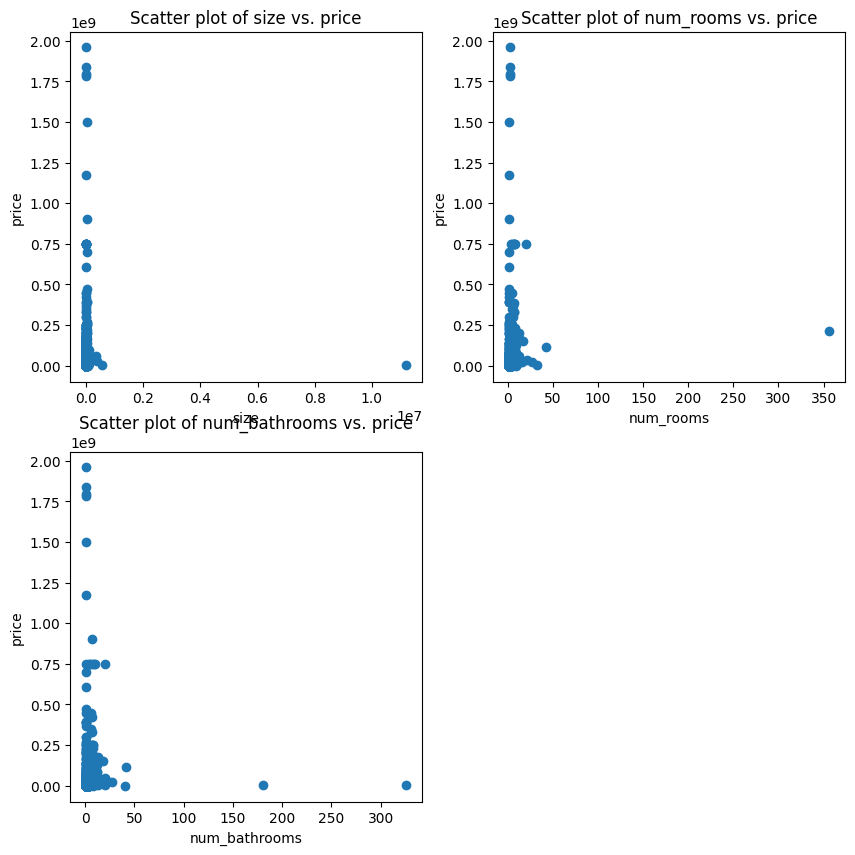

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(df3['size'], df3['price'])
axs[0, 0].set_title('Scatter plot of size vs. price')
axs[0, 0].set_xlabel('size')
axs[0, 0].set_ylabel('price')

axs[0, 1].scatter(df3['num_rooms'], df3['price'])
axs[0, 1].set_title('Scatter plot of num_rooms vs. price')
axs[0, 1].set_xlabel('num_rooms')
axs[0, 1].set_ylabel('price')

axs[1, 0].scatter(df3['num_bathrooms'], df3['price'])
axs[1, 0].set_title('Scatter plot of num_bathrooms vs. price')
axs[1, 0].set_xlabel('num_bathrooms')
axs[1, 0].set_ylabel('price')

# Hide the last subplot
axs[1, 1].axis('off')

plt.show()

- Remove outliers

In [27]:
df3 = df3[df3['size'] < 500]
df3 = df3[df3['num_rooms'] < 7]
df3 = df3[df3['price'] < 7000000]
df3 = df3[df3['price'] > 500000]
df3 = df3[df3['num_bathrooms'] < 7]


- Plots after removing outliers

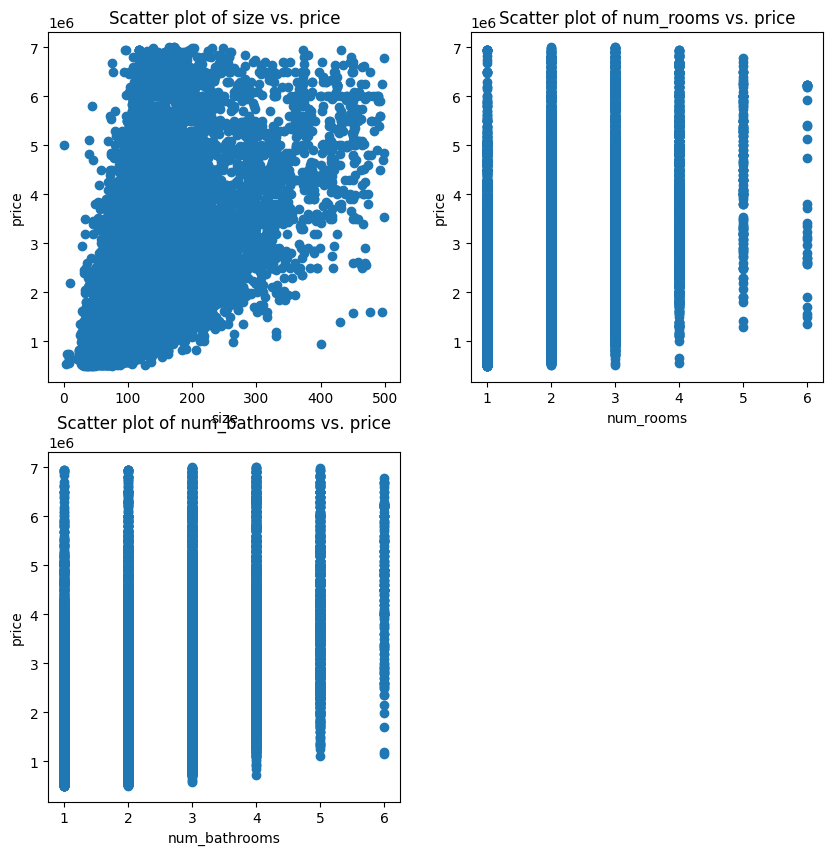

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(df3['size'], df3['price'])
axs[0, 0].set_title('Scatter plot of size vs. price')
axs[0, 0].set_xlabel('size')
axs[0, 0].set_ylabel('price')

axs[0, 1].scatter(df3['num_rooms'], df3['price'])
axs[0, 1].set_title('Scatter plot of num_rooms vs. price')
axs[0, 1].set_xlabel('num_rooms')
axs[0, 1].set_ylabel('price')

axs[1, 0].scatter(df3['num_bathrooms'], df3['price'])
axs[1, 0].set_title('Scatter plot of num_bathrooms vs. price')
axs[1, 0].set_xlabel('num_bathrooms')
axs[1, 0].set_ylabel('price')

# Hide the last subplot
axs[1, 1].axis('off')

plt.show()

### Create a correlation matrix

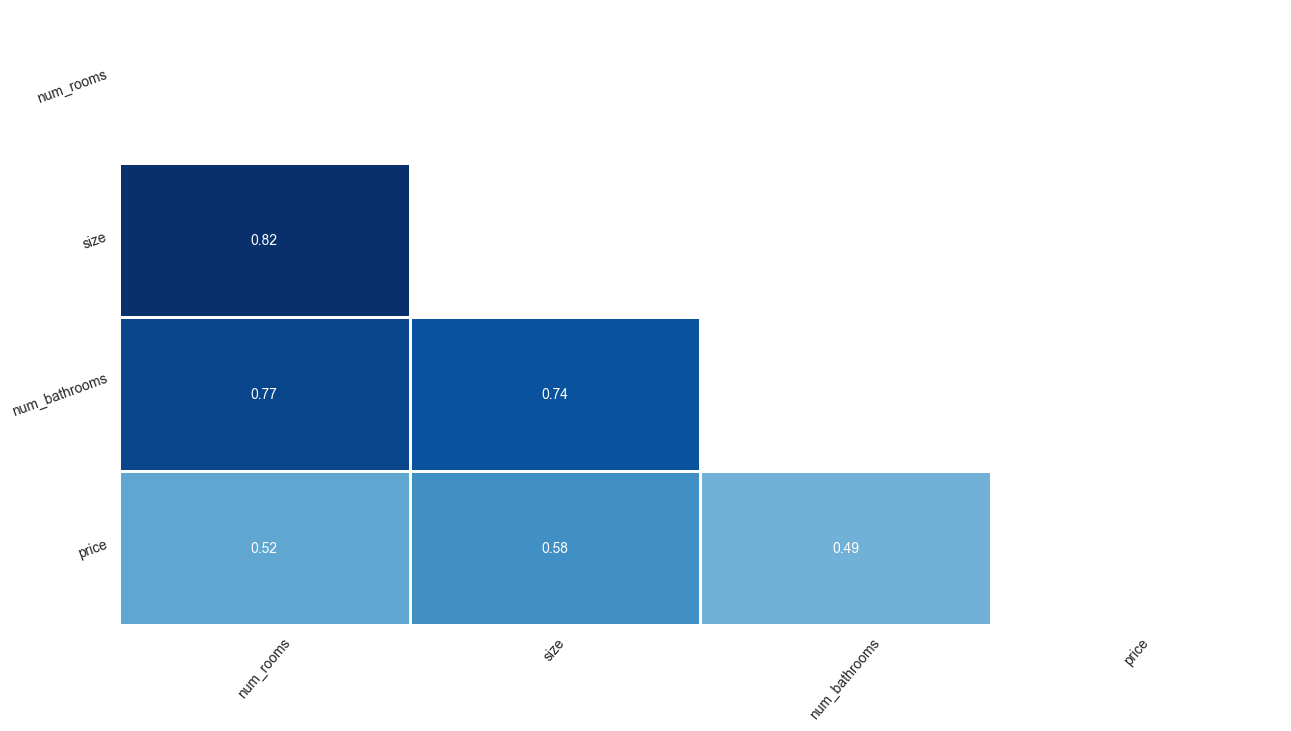

In [29]:
# create new dataframe with selected columns
df_selected = df3[['num_rooms', 'size', 'num_bathrooms', 'price']]

# correlation matrix
correlation = abs(df_selected.corr())

# select the lower triangle of the correlation matrix and mask the upper triangle
triangle = np.tril(correlation, k = -1)
mask = triangle == 0

# plot size
plt.figure(figsize=(15, 8))

# set white grid lines
sns.set_style(style="white")

# heat map
sns.heatmap(triangle, center=0.5, cmap="Blues", annot=True, xticklabels=correlation.index, yticklabels=correlation.columns, cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation = 50)
plt.yticks(rotation = 20)
plt.show()

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19416 entries, 0 to 24422
Columns: 125 entries, num_rooms to type_Warehouse
dtypes: float64(123), int64(2)
memory usage: 18.7 MB


In [31]:
df4 = df3.copy(deep=True)

test = pd.read_csv('X_2.csv')

diff_cols = set(df4.columns) - set(test.columns)
diff_cols.remove('region_Camelia')
diff_cols.remove('price')
diff_cols.remove('type_Apartment')

print(diff_cols)

df4.drop(diff_cols, axis=1, inplace=True)

# df4.drop(['num_bathrooms'], axis=1, inplace=True)

{'region_Al Barari'}


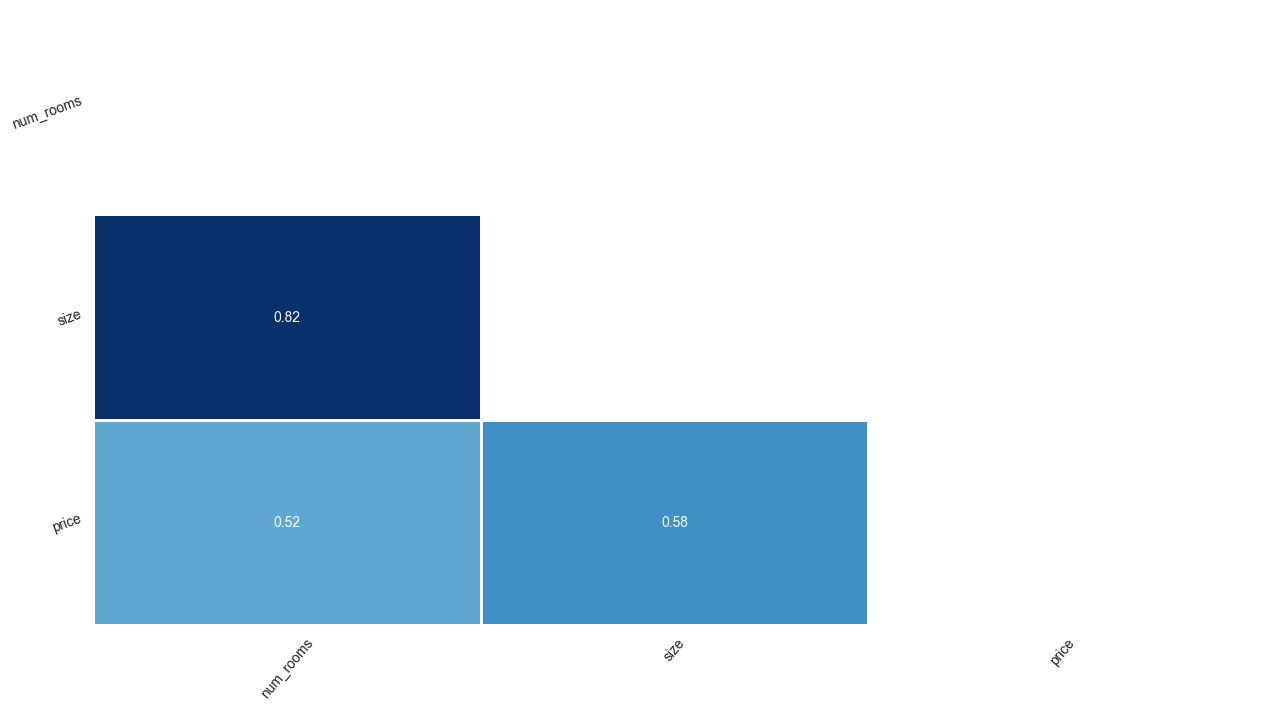

In [32]:
# create new dataframe with selected columns
df_selected = df4[['num_rooms', 'size', 'price']]

# correlation matrix
correlation = abs(df_selected.corr())

# select the lower triangle of the correlation matrix and mask the upper triangle
triangle = np.tril(correlation, k = -1)
mask = triangle == 0

# plot size
plt.figure(figsize=(15, 8))

# set white grid lines
sns.set_style(style="white")

# heat map
sns.heatmap(triangle, center=0.5, cmap="Blues", annot=True, xticklabels=correlation.index, yticklabels=correlation.columns, cbar=False, linewidths=1, mask=mask)
plt.xticks(rotation = 50)
plt.yticks(rotation = 20)
plt.show()

In [33]:
df4.reset_index(drop=True, inplace=True)

df4.tail()

,num_rooms,num_bathrooms,size,price,region_Al Barsha,region_Al Furjan,region_Al Jaddaf,region_Al Kifaf,region_Al Quoz,region_Al Safa,...,type_Hotel,type_Hotel Apartment,type_Labor Camp,type_Land,type_Office,type_Penthouse,type_Shop,type_Townhouse,type_Villa,type_Warehouse
19411,1,1,69.00,770819.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19412,1,1,127.00,1700000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19413,1,1,59.00,1633600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19414,1,1,102.00,1048150.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19415,2,2,136.38,2100000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Preprocessing the train dataset

In [34]:
y = df4['price']
X = df4.drop(['price'], axis=1)
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)  

In [35]:
X.tail()

,num_rooms,num_bathrooms,size,region_Al Barsha,region_Al Furjan,region_Al Jaddaf,region_Al Kifaf,region_Al Quoz,region_Al Safa,region_Al Satwa,...,type_Hotel,type_Hotel Apartment,type_Labor Camp,type_Land,type_Office,type_Penthouse,type_Shop,type_Townhouse,type_Villa,type_Warehouse
19411,1,1,69.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19412,1,1,127.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19413,1,1,59.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19414,1,1,102.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19415,2,2,136.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
y.tail()

19411     770819.0
19412    1700000.0
19413    1633600.0
19414    1048150.0
19415    2100000.0
Name: price, dtype: float64

In [37]:
y.describe()

count    1.941600e+04
mean     2.422866e+06
std      1.470589e+06
min      5.040000e+05
25%      1.240670e+06
50%      2.100000e+06
75%      3.294168e+06
max      6.999990e+06
Name: price, dtype: float64

In [38]:
count_above = (y > 7000000).sum()
print(f"Properties with price above 7 million AED: {count_above}")


count_below = (y < 1000000).sum()
print(f"Properties with price below 1 million AED: {count_below}")

count = y.shape[0] - (count_below + count_above)
print(f"Properties with price between 1 million and 5 million AED: {count}")

Properties with price above 7 million AED: 0
Properties with price below 1 million AED: 3355
Properties with price between 1 million and 5 million AED: 16061


In [39]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (19416, 123)
The shape of y is: (19416,)


In [58]:
load_dotenv()
print(os.getenv('DB_HOST2'))
print(os.getenv('DB_USER2'))
print(os.getenv('DB_PASSWORD2'))
print(os.getenv('DB_NAME2'))


aws.connect.psdb.cloud
d26zyor81n564aa9blhr
pscale_pw_z27tXrLv1QedWgQG28a71OwiDv21jTHLcxx9pHH1OIV
techprop-ai


In [60]:
try:
    connection = mysql.connector.connect(
        host=os.getenv('DB_HOST2'),
        user=os.getenv('DB_USER2'),
        password=os.getenv('DB_PASSWORD2'),
        database=os.getenv('DB_NAME2')
    )

    if connection.is_connected():
        print('Connected to MySQL database')

    # Define your SQL query to insert data
    sql_query = "INSERT INTO region (name) VALUES (%s)"
    values = []
    for col in X.columns:
        if 'region' in col:
            values.append((col[len("region_"):],))

    # Execute the SQL query to insert data
    cursor = connection.cursor()
    cursor.executemany(sql_query, values)
    connection.commit()
    print(f"Successfully inserted {cursor.rowcount} rows into the user table")

except Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    if connection.is_connected():
        connection.close()
        print('MySQL connection closed')

Connected to MySQL database
Successfully inserted 104 rows into the user table
MySQL connection closed


In [61]:
try:
    connection = mysql.connector.connect(
        host=os.getenv('DB_HOST2'),
        user=os.getenv('DB_USER2'),
        password=os.getenv('DB_PASSWORD2'),
        database=os.getenv('DB_NAME2')
    )

    if connection.is_connected():
        print('Connected to MySQL database')

    # Define your SQL query to insert data
    sql_query = "INSERT INTO type (name) VALUES (%s)"
    values = []
    for col in X.columns:
        if 'type' in col:
            values.append((col[len("type_"):],))

    # Execute the SQL query to insert data
    cursor = connection.cursor()
    cursor.executemany(sql_query, values)
    connection.commit()
    print(f"Successfully inserted {cursor.rowcount} rows into the user table")

except Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    if connection.is_connected():
        connection.close()
        print('MySQL connection closed')

Connected to MySQL database
Successfully inserted 16 rows into the user table
MySQL connection closed


In [53]:
val = []

for col in X.columns:
    if 'region' in col:
        val.append(col)

print(len(val))

104


```
import joblib

Load the saved model
loaded_model = joblib.load('your_model_filename.pkl')
model_filename = 'iris_model.pkl'
joblib.dump(model, model_filename)
``````

In [41]:
# X.to_csv('X_short_4.csv', index=False)
# y.to_csv('y_short_4.csv', index=False)

In [42]:
count = 0

for col in X.columns:
    if 'region' in col:
        count += 1

count

104

In [43]:
107-104

3